# Fixtures

In [1]:
#importing relevant packages
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Gatering URL, hopefully shouldnt change
#200 means success, anything beginning with a 4 is usually an error
url = "https://playerdatabase247.com/include_premier_league_fixture_tracker_uusi.php?listtype=expgoals"
r = requests.get(url)
print(r.status_code)

200


In [3]:
#Gathering the data
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find('table')
cells = table.find_all("td")

In [4]:
#scrape function
def scrape(cells):
    lizt = []
    for cell in cells:
        text = cell.text.strip()
        lizt.append(text)
    return(lizt)
    
output = scrape(cells)

In [5]:
#Converting to workable dataframe
output = np.array(output)
output = output.reshape(21,8)
output = pd.DataFrame(output)
header_row = 0
output.columns = output.iloc[header_row]
output = output.drop(header_row)
output = output.reset_index(drop = True)
output.columns = ["team", "gw1", "gw2", "gw3", "gw4", "gw5", "gw6", "total"]

### Overall plot for EG

In [6]:
output

,team,gw1,gw2,gw3,gw4,gw5,gw6,total
0,Liverpool,LEE2.68,che 2.09,ARS2.31,avl 2.18,eve 1.96,SHU2.34,13.56
1,Chelsea,bha 2.04,LIV1.90,wba 2.55,CRY2.63,SOU2.11,mun 1.20,12.42
2,Manchester City,-0.00,wol 1.23,LEI2.64,lee 2.31,ARS2.47,wes 2.55,11.19
3,Manchester United,-0.00,CRY2.51,bha 1.89,TOT1.79,new 2.09,CHE2.27,10.54
4,Arsenal,ful 2.03,WES2.24,liv 1.18,SHU1.77,mci 0.93,LEI1.77,9.92
5,Tottenham,EVE1.83,sou 1.31,NEW2.17,mun 0.90,WES2.11,bur 1.22,9.53
6,Southampton,cry 1.53,TOT1.39,bur 1.17,WBA2.15,che 1.39,EVE1.66,9.29
7,Leicester,wba 1.66,BUR1.35,mci 0.80,WES1.82,AVL1.71,ars 1.15,8.50
8,Wolverhampton,shu 0.99,MCI0.81,wes 1.22,FUL1.66,lee 1.08,NEW1.47,7.23
9,West Ham,NEW1.88,ars 1.18,WOL0.88,lei 1.20,tot 1.01,MCI0.97,7.12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

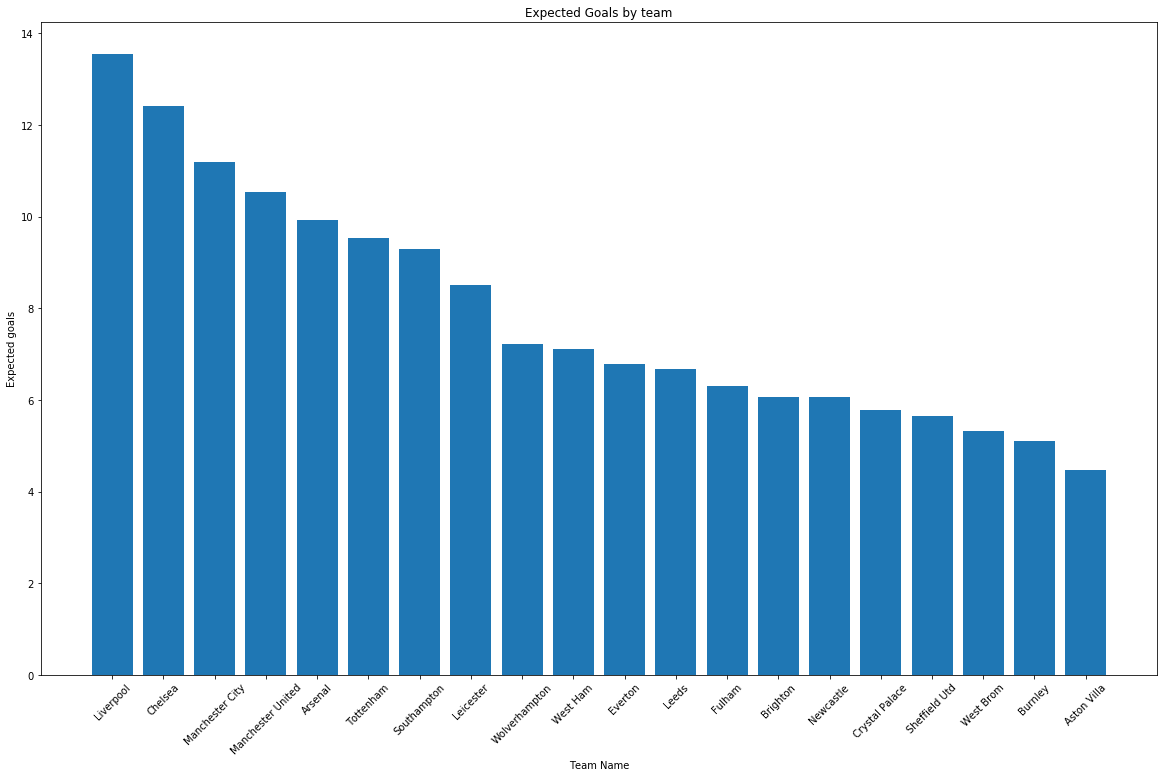

In [7]:
graph = pd.DataFrame(output)
x = np.array(graph.team)
y = graph.total.apply(float)
fig, ax = plt.subplots(figsize = (20,12))
ax.bar(x, y)
ax.set_ylabel("Expected goals")
ax.set_xlabel("Team Name")
ax.set_title("Expected Goals by team")
plt.xticks(rotation = 45)

### Regex to remove names and leave just numeric

In [8]:
def remove_char(string):
    import re
    string = re.sub("[A-Za-z]", "", string);
    return string


In [9]:
output.head()

,team,gw1,gw2,gw3,gw4,gw5,gw6,total
0,Liverpool,LEE2.68,che 2.09,ARS2.31,avl 2.18,eve 1.96,SHU2.34,13.56
1,Chelsea,bha 2.04,LIV1.90,wba 2.55,CRY2.63,SOU2.11,mun 1.20,12.42
2,Manchester City,-0.00,wol 1.23,LEI2.64,lee 2.31,ARS2.47,wes 2.55,11.19
3,Manchester United,-0.00,CRY2.51,bha 1.89,TOT1.79,new 2.09,CHE2.27,10.54
4,Arsenal,ful 2.03,WES2.24,liv 1.18,SHU1.77,mci 0.93,LEI1.77,9.92


In [10]:
output.gw1 = output.gw1.apply(remove_char)
output.gw1 = output.gw1.apply(float)
output.gw2 = output.gw2.apply(remove_char)
output.gw2 = output.gw2.apply(float)
output.gw3 = output.gw3.apply(remove_char)
output.gw3 = output.gw3.apply(float)
output.gw4 = output.gw4.apply(remove_char)
output.gw4 = output.gw4.apply(float)
output.gw5 = output.gw5.apply(remove_char)
output.gw5 = output.gw5.apply(float)
output.gw6 = output.gw6.apply(remove_char)
output.gw6 = output.gw6.apply(float)

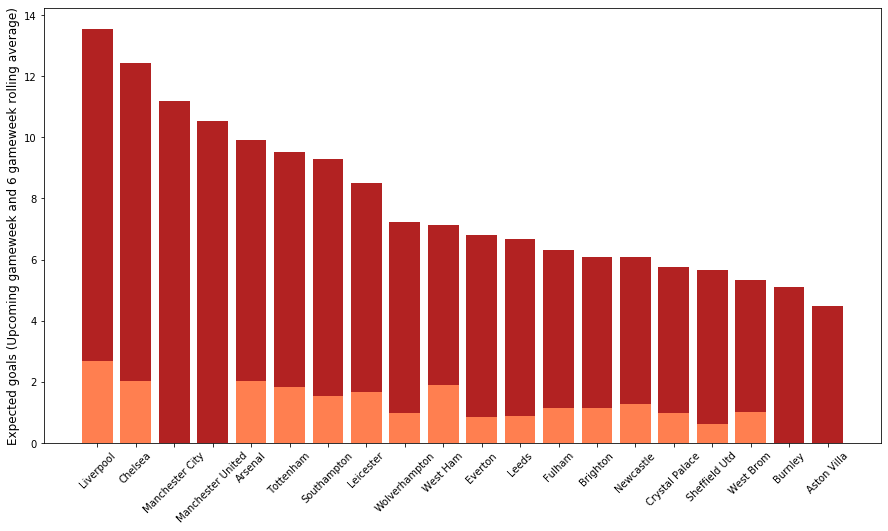

In [11]:
fig, ax = plt.subplots(figsize = (15,8))
output.total = output.total.apply(float)
ax.bar(output.team, output.total, color = "firebrick")
ax.bar(output.team, output.gw1, color = "coral")
ax.set_ylabel("Expected goals (Upcoming gameweek and 6 gameweek rolling average)", size = 12)
plt.xticks(rotation = 45)

plt.show()

As can be seen above, this figure shows the expected goals for both the upcoming (orange) week and a 6 gameweek moving average (red). This script will auto-update the fresh fixtures each week when ran. This can he used to make decicions on both which players to start and which players to bring in. 